In [1]:
import pandas as pd
import time
import numpy as np
from datetime import date, datetime, timedelta
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker

In [2]:
# file naming variables
today = date.today()
last_version = today - timedelta(days=12)
location = '/Users/Sim/Documents/Other/Programming/Personal Projects/house_price_monitoring'

In [4]:
last_version

datetime.date(2022, 12, 18)

In [6]:
# Load last week's data
df = pd.read_csv(f'{location}/data/df_{last_version}.csv')
df = df.drop('Unnamed: 0', axis=1)
df['Date'] = pd.to_datetime(df['Date'],dayfirst = True, format = "%d/%m/%Y")
df['CI_upp'] = 1.28*(df['Std dev']/df['Sample Size']**0.5)
df['CI_low'] = -df['CI_upp']

df2= df
df2

,Date,Average Price,Median Price,10th Percentile,90th Percentile,Std dev,Sample Size,CI_upp,CI_low
0,2022-11-06,867789.56,850000.0,524000.0,1250000.0,303834.617,120,35502.309009,-35502.309009
1,2022-11-13,952266.24,875000.0,497500.0,1477500.0,448923.051,120,52455.526745,-52455.526745
2,2022-11-20,871647.03,812500.0,500000.0,1254500.0,327990.409,120,38324.852406,-38324.852406
3,2022-11-27,898337.72,850000.0,532500.0,1335000.0,324512.391,114,38903.513740,-38903.513740
4,2022-12-04,890525.88,820000.0,500000.0,1345000.0,347098.867,112,41981.132911,-41981.132911
5,2022-12-11,827932.29,795000.0,479500.0,1250000.0,306829.606,82,43371.086893,-43371.086893
6,2022-12-18,863356.70,795000.0,500000.0,1276000.0,426277.487,67,66659.947172,-66659.947172


In [35]:
#np.shape(np.transpose(np.array(df2[['CI_upp','CI_low']])))
np.amax(np.array(df2[['CI_upp']]))

52455.526744904986

In [7]:
pd.to_datetime(df2.loc[1,'Date'],dayfirst = True, format = "%d/%m")

2022-11-13 00:00:00


In [12]:
def plot(stat = "Median", incl_percentiles = False, incl_CI80 = False, start = "2022-11-06", end = "2024-11-06"):
    df3 = df2[(df2['Date']>=start) & (df2['Date']<=end)]
    fig, ax = plt.subplots()
    
    # plot points  
    ax.plot(df3['Date'].apply(lambda x: x.strftime('%d/%m')),df3[f'{stat} Price'], ".", color = 'b')
    
    # add error bars
    yerr = np.transpose(np.array(df3[['CI_upp']]))
    if incl_CI80 == True: 
        ax.errorbar(df3['Date'].apply(lambda x: x.strftime('%d/%m')),df3[f'{stat} Price'], yerr=yerr, alpha = 0.5)
    
    # plot lines
    ax.plot(df3['Date'].apply(lambda x: x.strftime('%d/%m')),df3[f'{stat} Price'], color = 'b')

    # formatting
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: '£{:,}'.format(int(x), ',')))
    ax.yaxis.set_tick_params(which='major', labelcolor='black',labelleft=True)

    plt.ylabel(f'{stat} Price')
    plt.xlabel('Date')
    plt.ylim([min(df3[f'{stat} Price'])- np.amax(yerr), max(df3[f'{stat} Price'])+np.amax(yerr)])


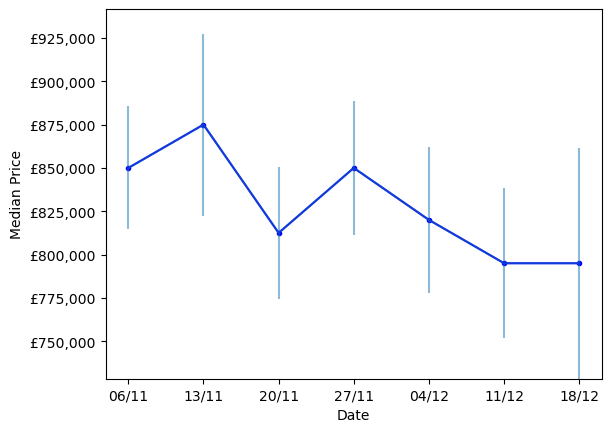

In [18]:
# Testing
plot(stat = "Median", start = '2022-11-01', incl_CI80 = True)

In [172]:
full_df2 = pd.read_csv(f'{location}/data/full_df_{last_version}.csv')
full_df2 = full_df2.drop('Unnamed: 0', axis=1)
full_df2 = full_df2[['Price', 'DateScraped']]
full_df2['Date'] = pd.to_datetime(full_df2['DateScraped'])
full_df2['Year'] = full_df2['Date'].dt.strftime('%Y')
full_df2['Month'] = full_df2['Date'].dt.strftime('%m')
full_df2['MonthYear'] = full_df2['Date'].dt.strftime('%m-%Y')
full_df2['WeekNo'] = full_df2['Date'].dt.strftime('%u')
full_df2['Fortnight'] = full_df2['WeekNo'].astype(int)//2

full_df2.tail()

,Price,DateScraped,Date,Year,Month,MonthYear,WeekNo,Fortnight
730,800000,2022-12-18,2022-12-18,2022,12,12-2022,51,25
731,1400000,2022-12-18,2022-12-18,2022,12,12-2022,51,25
732,800000,2022-12-18,2022-12-18,2022,12,12-2022,51,25
733,750000,2022-12-18,2022-12-18,2022,12,12-2022,51,25
734,360000,2022-12-18,2022-12-18,2022,12,12-2022,51,25


In [178]:
full_df2

,Price,DateScraped,Date,Year,Month,MonthYear,WeekNo,Fortnight
0,950000,2022-11-06,2022-11-06,2022,11,11-2022,45,22
1,990000,2022-11-06,2022-11-06,2022,11,11-2022,45,22
2,490000,2022-11-06,2022-11-06,2022,11,11-2022,45,22
3,495000,2022-11-06,2022-11-06,2022,11,11-2022,45,22
4,899950,2022-11-06,2022-11-06,2022,11,11-2022,45,22
...,...,...,...,...,...,...,...,...
730,800000,2022-12-18,2022-12-18,2022,12,12-2022,51,25
731,1400000,2022-12-18,2022-12-18,2022,12,12-2022,51,25
732,800000,2022-12-18,2022-12-18,2022,12,12-2022,51,25
733,750000,2022-12-18,2022-12-18,2022,12,12-2022,51,25


In [177]:
ds2 = full_df2.groupby('Fortnight').agg({'Price': ['mean', 'median', 'std', 'count']})
ds2['90_CI'] = 1.645*(ds2['Price']['std']/ds2['Price']['count']**0.5)
ds2 = ds2.reset_index()
ds2

Fortnight          Price                                        90_CI
                      mean    median            std count              
0        22  867789.558333  850000.0  305108.561837   120  45817.319128
1        23  911956.637500  850000.0  396021.644398   240  42051.278485
2        24  894466.367257  839500.0  336663.938658   226  36839.038169
3        25  843861.389262  795000.0  367063.304235   149  49466.790999

In [197]:
#fig, ax = plt.subplots()
    
#ax.plot(ds2['Price']['median'],color = 'b', use_index = True)
#ds['Date']=ds['Date'].astype(str)
interval = 'Fortnight'
ds2= ds.groupby(f'{interval}').agg({'Price': ['mean', 'median', 'std', 'count']})
ds2

Price                               
                    mean    median            std count
Fortnight                                              
22         867789.558333  850000.0  305108.561837   120
23         911956.637500  850000.0  396021.644398   240
24         894466.367257  839500.0  336663.938658   226
25         843861.389262  795000.0  367063.304235   149

In [189]:
ds.groupby('Date').agg({'Price': ['mean', 'median', 'std', 'count']})
type(ds.loc[1,'Date'])

pandas._libs.tslibs.timestamps.Timestamp

In [186]:
def plot2(interval = "Month", stat = "median", incl_CI90 = False, start = "2022-11-06", end = "2024-11-06"):
    full_df3 = full_df2[(full_df2['Date']>=start) & (full_df2['Date']<=end)]
    full_df3 = full_df3.groupby(f'{interval}').agg({'Price': ['mean', 'median', 'std', 'count']})
    full_df3 = full_df3.reset_index()
    
    full_df3['90_CI'] = 1.645*(full_df3['Price']['std']/full_df3['Price']['count']**0.5)

    fig, ax = plt.subplots()
    
    # plot points     
    if interval == "Date":
        ax.plot(full_df3[f'{interval}'].apply(lambda x: x.strftime('%d/%m')),full_df3['Price'][f'{stat}'], ".", color = 'b')

        # add error bars
        yerr = np.transpose(np.array(full_df3[['90_CI']]))
        if incl_CI90 == True: 
            ax.errorbar(full_df3[f'{interval}'].apply(lambda x: x.strftime('%d/%m')),full_df3['Price'][f'{stat}'], yerr=yerr, alpha = 0.5)

        # plot lines
        ax.plot(full_df3[f'{interval}'].apply(lambda x: x.strftime('%d/%m')),full_df3['Price'][f'{stat}'], color = 'b')

    else:
        ax.plot(full_df3[f'{interval}'],full_df3['Price'][f'{stat}'], ".", color = 'b')
        
        # add error bars
        yerr = np.transpose(np.array(full_df3[['90_CI']]))
        if incl_CI90 == True: 
            ax.errorbar(full_df3[f'{interval}'],full_df3['Price'][f'{stat}'], yerr=yerr, alpha = 0.5)

        # plot lines
        ax.plot(full_df3[f'{interval}'],full_df3['Price'][f'{stat}'], color = 'b')

        
    # formatting
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: '£{:,}'.format(int(x), ',')))
    ax.yaxis.set_tick_params(which='major', labelcolor='black',labelleft=True)

    plt.ylabel(f'{stat} Price')
    plt.xlabel(f'{interval}')
    plt.ylim([min(full_df3['Price'][f'{stat}'])- np.amax(yerr), max(full_df3['Price'][f'{stat}'])+np.amax(yerr)])
    
    plt.savefig(f'{location}/charts/{today}_{interval}_{stat}.png')

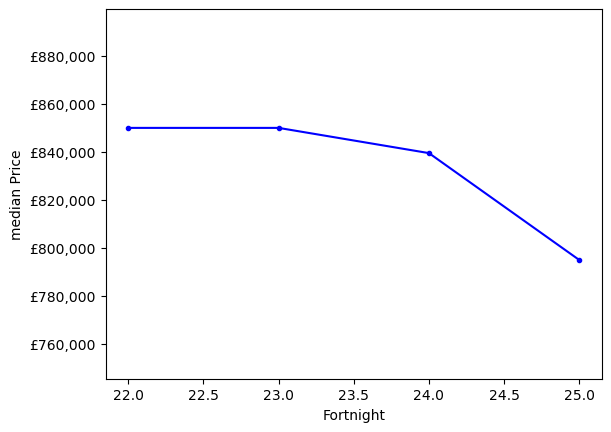

In [187]:
# Testing
plot2(interval = "Fortnight", stat = "median", incl_CI90 = False)


In [201]:
location = '/Users/Sim/Documents/Other/Programming/Personal Projects/house_price_monitoring/test/data'
dw = pd.read_csv(f'{location}/full_df_2023-01-04.csv')
dw = dw.drop('Unnamed: 0', axis=1)
dw.tail()

,Links,DateTimeScraped,DateScraped,Price,Featured,Date,Year,Month,MonthYear,WeekNo,Fortnight
789,https://www.rightmove.co.uk/properties/1303552...,2023-01-04 21:52:00,2023-01-04,1275000,0,2023-01-04,2023,1,2023-01,1,1
790,https://www.rightmove.co.uk/properties/1303154...,2023-01-04 21:52:00,2023-01-04,500000,0,2023-01-04,2023,1,2023-01,1,1
791,https://www.rightmove.co.uk/properties/1303767...,2023-01-04 21:52:00,2023-01-04,700000,0,2023-01-04,2023,1,2023-01,1,1
792,https://www.rightmove.co.uk/properties/1303920...,2023-01-04 21:52:00,2023-01-04,850000,0,2023-01-04,2023,1,2023-01,1,1
793,https://www.rightmove.co.uk/properties/1295743...,2023-01-04 21:52:00,2023-01-04,990000,0,2023-01-04,2023,1,2023-01,1,1


In [210]:
interval = 'Fortnight'
dw['Fortnight'] = dw['Fortnight'].apply(str)
dw2 = dw.groupby(f'{interval}').agg({'Price': ['mean', 'median', 'std', 'count']})
dw2


Price                               
                    mean    median            std count
Fortnight                                              
1          825455.915254  795000.0  267999.372469    59
22         867789.558333  850000.0  305108.561837   120
23         911956.637500  850000.0  396021.644398   240
24         894466.367257  839500.0  336663.938658   226
25         843861.389262  795000.0  367063.304235   149